# Multiple Linear Regression Cars CO2 Emission



This python code is baesd on Somple linear Regression Project of cars CO2 emission that will be upgraded to Multiple kind .

In [23]:
import pandas as pd 
import numpy as np 
import  pylab as pl
import matplotlib.pyplot as plt 
%matplotlib inline 

In [7]:
df = pd.read_csv("FuelConsumption.csv")
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
cdf= df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG" , "CO2EMISSIONS"]]
cdf


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


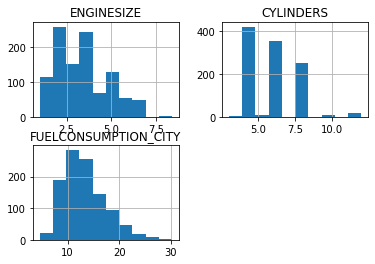

In [13]:
vis = cdf[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY"]]
vis.hist()
plt.show()

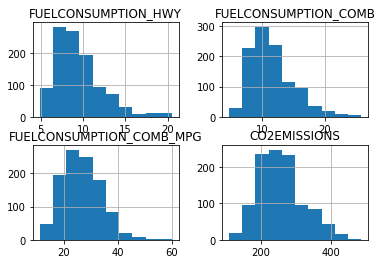

In [15]:
vis = cdf[["FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG" , "CO2EMISSIONS"]]
vis.hist()
plt.show()

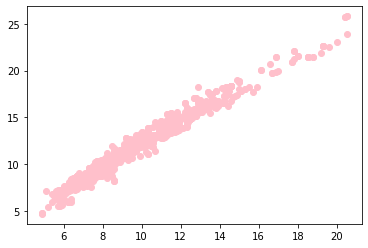

In [26]:
plt.scatter(cdf.FUELCONSUMPTION_HWY , cdf.FUELCONSUMPTION_COMB ,color="pink")
plt.show()

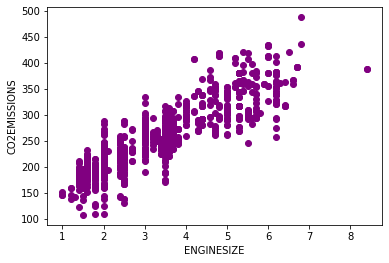

In [29]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS , color = 'purple' )
plt.xlabel("ENGINESIZE")
plt.ylabel('CO2EMISSIONS')
plt.show()

## Create test and train dataset 


In [48]:
mask = np.random.rand(len(cdf)) < 0.8
train = cdf[mask]
test = cdf[~mask]




Text(0, 0.5, 'CO2EMSSION')

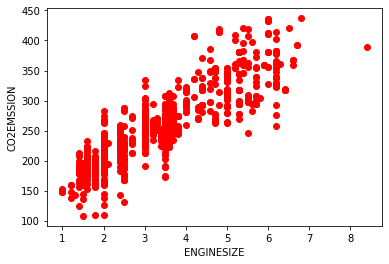

In [49]:
plt.scatter(train.ENGINESIZE  , train.CO2EMISSIONS , color= 'red')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMSSION")

## Multiple Regression Model 

In [75]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print('COEFFICIENTS  :' ,  regr.coef_ , 'Intercept : ' , regr.intercept_)
print(regr.coef_[0][1])

COEFFICIENTS  : [[11.26831081  7.36134682  9.32914741]] Intercept :  [67.5514072]
7.3613468184315245


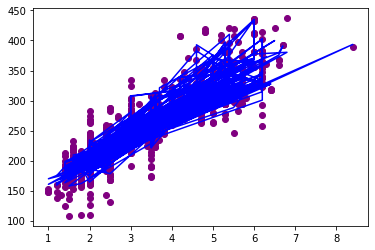

In [64]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color='purple')
plt.plot(train.ENGINESIZE , (train.ENGINESIZE * regr.coef_[0][0] + train.CYLINDERS * regr.coef_[0][1] + train.FUELCONSUMPTION_COMB *regr.coef_[0][2] + regr.intercept_) , '-b')
plt.show()

In [ ]:
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])


## Prediction 

In [76]:

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_hat = regr.predict(test_x)
test_y = np.asanyarray(test[['CO2EMISSIONS']])

print("R2 score  : %.2f" % r2_score(test_y , y_hat))

R2 score  : 0.88


### More practice 

Use a multiple linear regression with the same dataset, but this time use __FUEL CONSUMPTION in CITY__ and 
__FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB.

In [77]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS' , 'FUELCONSUMPTION_CITY' , 'FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x , train_y)

print(regr.coef_ , regr.intercept_)

[[11.28931517  7.03276669  6.05037833  2.99317055]] [68.58327706]


In [78]:

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS' , 'FUELCONSUMPTION_CITY' , 'FUELCONSUMPTION_HWY']])
y_hat = regr.predict(test_x)
test_y = np.asanyarray(test[['CO2EMISSIONS']])

print("R2 score  : %.2f" % r2_score(test_y , y_hat))

R2 score  : 0.88
